In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

In [3]:
pima=pd.read_csv('/Users/ness001/Downloads/datas/diabetes.csv')

In [4]:
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
X=pima[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y=pima.Outcome

In [6]:
pima.shape

(768, 9)

# model

In [7]:
seed=0
test_size=0.33

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_size,random_state=seed)

In [10]:
import xgboost

In [11]:
model=xgboost.XGBClassifier()

In [12]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('accuracy_score:%f'%accuracy_score(y_pred,y_test))

accuracy_score:0.763780


# 交叉验证 cross validate 不是 cross val score

In [13]:
cross_validate(model,X,y,return_train_score=True,cv=3)
#cv指的是测试的次数

{'fit_time': array([0.03623605, 0.03360295, 0.03319025]),
 'score_time': array([0.00207996, 0.00161195, 0.00161481]),
 'test_score': array([0.75486381, 0.75390625, 0.81960784]),
 'train_score': array([0.91193738, 0.91992188, 0.90643275])}

## no cv

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score=cross_val_score(model,X_train,y_train,scoring='accuracy')

/Users/ness001/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


## cv=3

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=3)
print(cross_val_score)

[0.79651163 0.73684211 0.74269006]


## cv=kfold
有坑。我们必须每次评估之间都加入from 语句

In [16]:
from sklearn.model_selection import KFold

In [17]:
kfold=KFold(n_splits=5,random_state=seed)

In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=kfold)
print(cross_val_score)

[0.75728155 0.77669903 0.7961165  0.69902913 0.75490196]


In [19]:
# grid search

In [20]:
param={'learning_rate':[0.1,0.3],'n_estimators':[30,50,80]}

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
model_grid=GridSearchCV(model,param_grid=param,refit=True,verbose=2 )

In [23]:
model_grid.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] learning_rate=0.1, n_estimators=30 ..............................
[CV] ............... learning_rate=0.1, n_estimators=30, total=   0.0s
[CV] learning_rate=0.1, n_estimators=30 ..............................
[CV] ............... learning_rate=0.1, n_estimators=30, total=   0.0s
[CV] learning_rate=0.1, n_estimators=30 ..............................
[CV] ............... learning_rate=0.1, n_estimators=30, total=   0.0s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] ............... learning_rate=0.1, n_estimators=50, total=   0.0s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] ............... learning_rate=0.1, n_estimators=50, total=   0.0s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] ............... learning_rate=0.1, n_estimators=50, total=   0.0s
[CV] learning_rate=0.1, n_estimators=80 ..............................
[CV] ............

/Users/ness001/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... learning_rate=0.3, n_estimators=30, total=   0.0s
[CV] learning_rate=0.3, n_estimators=30 ..............................
[CV] ............... learning_rate=0.3, n_estimators=30, total=   0.0s
[CV] learning_rate=0.3, n_estimators=30 ..............................
[CV] ............... learning_rate=0.3, n_estimators=30, total=   0.0s
[CV] learning_rate=0.3, n_estimators=50 ..............................
[CV] ............... learning_rate=0.3, n_estimators=50, total=   0.0s
[CV] learning_rate=0.3, n_estimators=50 ..............................
[CV] ............... learning_rate=0.3, n_estimators=50, total=   0.0s
[CV] learning_rate=0.3, n_estimators=50 ..............................
[CV] ............... learning_rate=0.3, n_estimators=50, total=   0.0s
[CV] learning_rate=0.3, n_estimators=80 ..............................
[CV] ............... learning_rate=0.3, n_estimators=80, total=   0.0s
[CV] learning_rate=0.3, n_estimators=80 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.1, 0.3], 'n_estimators': [30, 50, 80]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

# 网格搜索最优参数，kfold交叉验证分数评估

In [24]:
y_grid_preds=model_grid.predict(X_test)
print(accuracy_score(y_grid_preds,y_test))

from sklearn.model_selection import cross_val_score
crossk=cross_val_score(model_grid,X_train,y_train,scoring='accuracy',cv=kfold)
print(crossk)

0.7637795275590551
Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] learning_rate=0.1, n_estimators=30 ..............................
[CV] ............... learning_rate=0.1, n_estimators=30, total=   0.0s
[CV] learning_rate=0.1, n_estimators=30 ..............................


/Users/ness001/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... learning_rate=0.1, n_estimators=30, total=   0.0s
[CV] learning_rate=0.1, n_estimators=30 ..............................
[CV] ............... learning_rate=0.1, n_estimators=30, total=   0.0s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] ............... learning_rate=0.1, n_estimators=50, total=   0.0s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] ............... learning_rate=0.1, n_estimators=50, total=   0.0s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] ............... learning_rate=0.1, n_estimators=50, total=   0.0s
[CV] learning_rate=0.1, n_estimators=80 ..............................
[CV] ............... learning_rate=0.1, n_estimators=80, total=   0.0s
[CV] learning_rate=0.1, n_estimators=80 ..............................
[CV] ............... learning_rate=0.1, n_estimators=80, total=   0.0s
[CV] learning_rate=0.1, n_estimators=80 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished
/Users/ness001/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... learning_rate=0.1, n_estimators=80, total=   0.0s
[CV] learning_rate=0.3, n_estimators=30 ..............................
[CV] ............... learning_rate=0.3, n_estimators=30, total=   0.0s
[CV] learning_rate=0.3, n_estimators=30 ..............................
[CV] ............... learning_rate=0.3, n_estimators=30, total=   0.0s
[CV] learning_rate=0.3, n_estimators=30 ..............................
[CV] ............... learning_rate=0.3, n_estimators=30, total=   0.0s
[CV] learning_rate=0.3, n_estimators=50 ..............................
[CV] ............... learning_rate=0.3, n_estimators=50, total=   0.0s
[CV] learning_rate=0.3, n_estimators=50 ..............................
[CV] ............... learning_rate=0.3, n_estimators=50, total=   0.0s
[CV] learning_rate=0.3, n_estimators=50 ..............................
[CV] ............... learning_rate=0.3, n_estimators=50, total=   0.0s
[CV] learning_rate=0.3, n_estimators=80 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished
/Users/ness001/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... learning_rate=0.1, n_estimators=50, total=   0.0s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] ............... learning_rate=0.1, n_estimators=50, total=   0.0s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV] ............... learning_rate=0.1, n_estimators=50, total=   0.0s
[CV] learning_rate=0.1, n_estimators=80 ..............................
[CV] ............... learning_rate=0.1, n_estimators=80, total=   0.0s
[CV] learning_rate=0.1, n_estimators=80 ..............................
[CV] ............... learning_rate=0.1, n_estimators=80, total=   0.0s
[CV] learning_rate=0.1, n_estimators=80 ..............................
[CV] ............... learning_rate=0.1, n_estimators=80, total=   0.0s
[CV] learning_rate=0.3, n_estimators=30 ..............................
[CV] ............... learning_rate=0.3, n_estimators=30, total=   0.0s
[CV] learning_rate=0.3, n_estimators=30 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished
/Users/ness001/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... learning_rate=0.3, n_estimators=30, total=   0.0s
[CV] learning_rate=0.3, n_estimators=30 ..............................
[CV] ............... learning_rate=0.3, n_estimators=30, total=   0.0s
[CV] learning_rate=0.3, n_estimators=30 ..............................
[CV] ............... learning_rate=0.3, n_estimators=30, total=   0.0s
[CV] learning_rate=0.3, n_estimators=50 ..............................
[CV] ............... learning_rate=0.3, n_estimators=50, total=   0.0s
[CV] learning_rate=0.3, n_estimators=50 ..............................
[CV] ............... learning_rate=0.3, n_estimators=50, total=   0.0s
[CV] learning_rate=0.3, n_estimators=50 ..............................
[CV] ............... learning_rate=0.3, n_estimators=50, total=   0.0s
[CV] learning_rate=0.3, n_estimators=80 ..............................
[CV] ............... learning_rate=0.3, n_estimators=80, total=   0.0s
[CV] learning_rate=0.3, n_estimators=80 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished
/Users/ness001/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... learning_rate=0.3, n_estimators=30, total=   0.0s
[CV] learning_rate=0.3, n_estimators=50 ..............................
[CV] ............... learning_rate=0.3, n_estimators=50, total=   0.0s
[CV] learning_rate=0.3, n_estimators=50 ..............................
[CV] ............... learning_rate=0.3, n_estimators=50, total=   0.0s
[CV] learning_rate=0.3, n_estimators=50 ..............................
[CV] ............... learning_rate=0.3, n_estimators=50, total=   0.0s
[CV] learning_rate=0.3, n_estimators=80 ..............................
[CV] ............... learning_rate=0.3, n_estimators=80, total=   0.0s
[CV] learning_rate=0.3, n_estimators=80 ..............................
[CV] ............... learning_rate=0.3, n_estimators=80, total=   0.0s
[CV] learning_rate=0.3, n_estimators=80 ..............................
[CV] ............... learning_rate=0.3, n_estimators=80, total=   0.0s
[0.74757282 0.77669903 0.78640777 0.67961165 0.79411765]


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished


# 获得最优参数

In [25]:
model_grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 80}

# 分类报告 classification report

从效果上来看，xgboost效果也就如此了，使用网格搜索得到的参数评估结果还是如此，可见xgboost可能不太需要调参可能获得较好的结果。比上一个学习文档svc效果好太多了。


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_grid_preds))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       170
           1       0.67      0.56      0.61        84

   micro avg       0.76      0.76      0.76       254
   macro avg       0.74      0.71      0.72       254
weighted avg       0.76      0.76      0.76       254



# 混淆矩阵

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix=confusion_matrix(y_test,y_grid_preds)
sns.heatmap(data=confusion_matrix,annot=True)

In [28]:
print(confusion_matrix)

[[147  23]
 [ 37  47]]


# xgboost自带特征重要程度排序

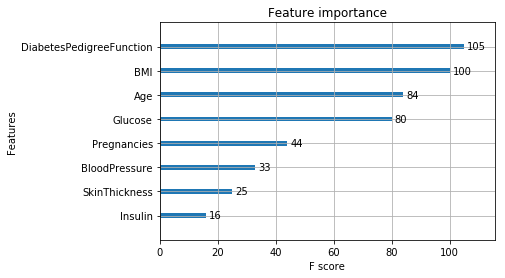

In [29]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

model_new=xgboost.XGBClassifier(learning_rate=0.1,n_estimators=80)
model_new.fit(X_train,y_train)
plot_importance(model_new)
plt.show()

# ?others

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostRegressor